## Bike Sharing Case Study - Linear Regression Model

**Problem Statement:**
     Aspires to understand the demand for shared bikes among the people, how exactly the demands vary with different features. 
   
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands 
    

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings 
warnings.filterwarnings("ignore")

### Inspecting dataframe

In [2]:
# Reading the data
df = pd.read_csv('day.csv')#importing data using pandas library

# Checking for columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [3]:
#converting to datetime 
df['dteday'] = pd.to_datetime(df["dteday"])

In [4]:
# Checking the distribution of numerical variables
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
# Checking for number of rows and columns
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [6]:
# Checing for duplicate data
df.duplicated().any()

False

In [7]:
# Checking for null values
df.isnull().any()

instant       False
dteday        False
season        False
yr            False
mnth          False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

In [8]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


##### categorical variables mapping 

weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy -> Clear
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ->  Mist + Cloudy
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds -> Light Snow
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog -> Snow + Fog
season :
        - 1:spring
        - 2:summer
        - 3:fall
        - 4:winter
yr : 
        - 0: 2018
        - 1:2019 
mnth : 
        - 1 to 12
holiday : 
        - weather day is a holiday or not 
weekday : 
        - day of the week
workingday : 
        - if day is neither weekend nor holiday is 1, otherwise is 0.


In [9]:
#convert numerical variable to categorical variables
cat_val = {"weathersit": { 1:"Clear", 2: "Mist + Cloudy", 3: "Light Snow", 4:"Snow + Fog"},
           "season" : { 1: "spring", 2: "summer", 3:"fall" , 4: "winter"},
           "mnth" : { 1: "Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"June", 7:"July", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec" },
           "weekday" : { 0: "Sunday", 1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6:"Saturday"}}
df.replace(cat_val, inplace= True)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Monday,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,Jan,0,Tuesday,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
df.weathersit.value_counts()

Clear            463
Mist + Cloudy    246
Light Snow        21
Name: weathersit, dtype: int64

In [11]:
df.weekday.value_counts()

Monday       105
Tuesday      105
Sunday       104
Friday       104
Thursday     104
Saturday     104
Wednesday    104
Name: weekday, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

### Data Visualization

In [13]:
#numerical column dataframe
#removing instant and dteday as not required
df_num = df.select_dtypes(exclude=["datetime","object"]).drop(columns=["instant"],axis=1)

# droppina 'holiday','workingday','yr' as they are categorical column in binary form
df_num = df_num.drop(['holiday','workingday','yr'], 1) 

df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        730 non-null    float64
 1   atemp       730 non-null    float64
 2   hum         730 non-null    float64
 3   windspeed   730 non-null    float64
 4   casual      730 non-null    int64  
 5   registered  730 non-null    int64  
 6   cnt         730 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 40.0 KB


In [14]:
#categorical column dataframe
#adding 'holiday','workingday','yr' to categorical dataset 

cols= ['holiday','workingday','yr']
df_cat=df.select_dtypes(include=["object"])
df_cat[cols] = df[cols]

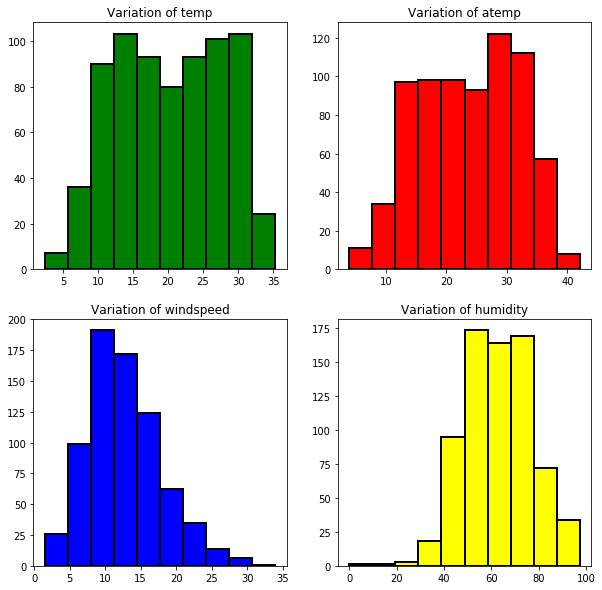

In [15]:
# histograms for all the continuous variables.

fig,axes=plt.subplots(2,2)
axes[0,0].hist(x="temp",data=df,edgecolor="black",linewidth=2,color='green')
axes[0,0].set_title("Variation of temp")
axes[0,1].hist(x="atemp",data=df,edgecolor="black",linewidth=2,color='red')
axes[0,1].set_title("Variation of atemp")
axes[1,0].hist(x="windspeed",data=df,edgecolor="black",linewidth=2,color='blue')
axes[1,0].set_title("Variation of windspeed")
axes[1,1].hist(x="hum",data=df,edgecolor="black",linewidth=2,color='yellow')
axes[1,1].set_title("Variation of humidity")
fig.set_size_inches(10,10)

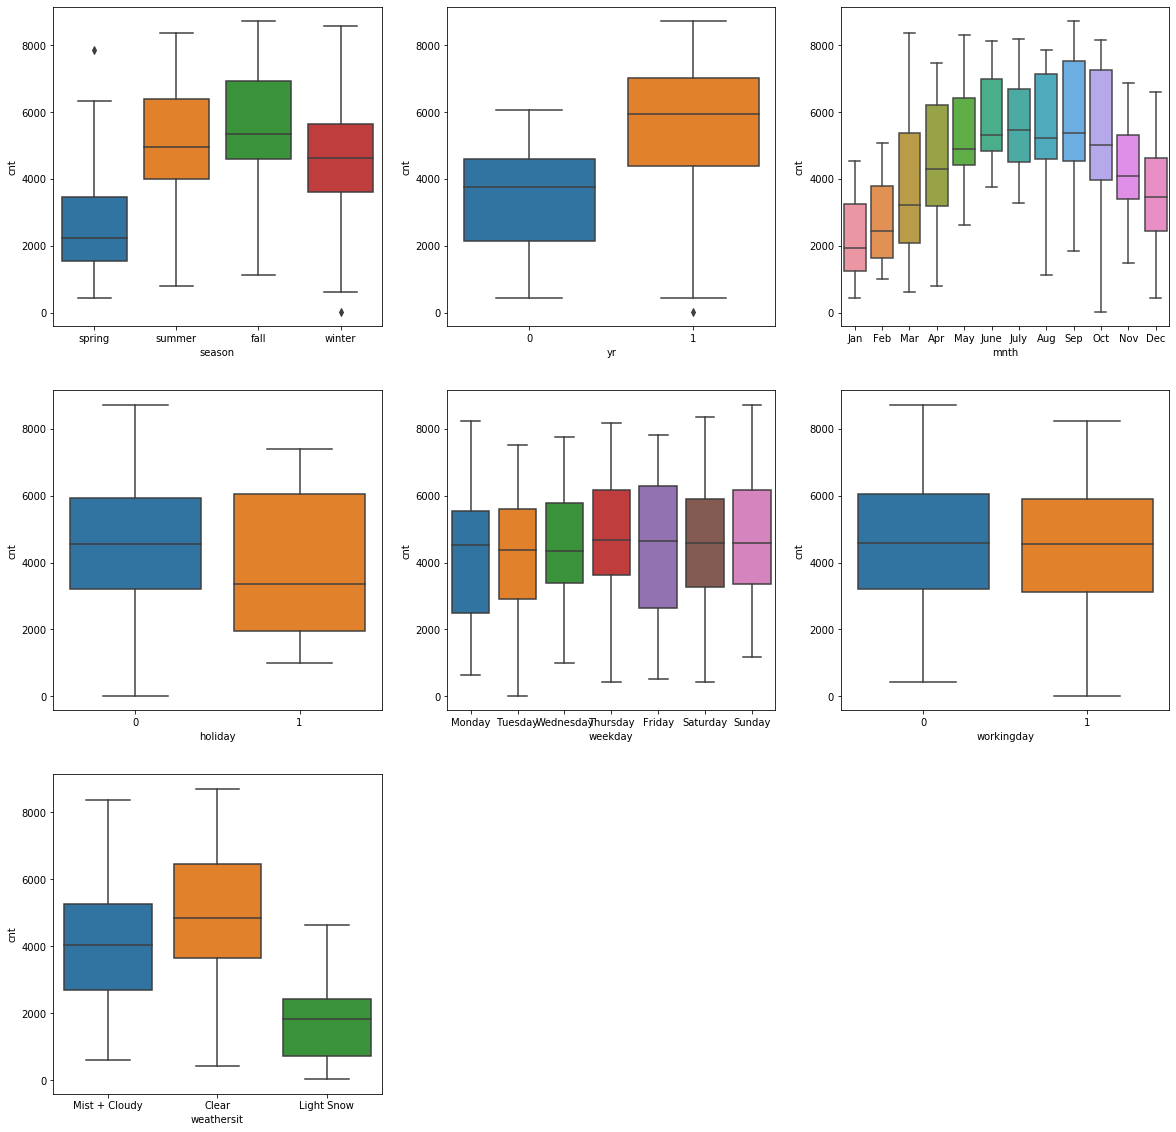

In [16]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x = 'season',y='cnt',data=df)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr',y='cnt',data=df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth',y='cnt',data=df)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday',y='cnt',data=df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday',y='cnt',data=df)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday',y='cnt',data=df)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit',y='cnt',data=df)

Observations from above boxplots of categorical variables:
    
- The year box plots indicates that more bikes are rent during 2019.
- The season box plots indicates that more bikes are rent during fall season.
- The working day and holiday box plots indicate that more bikes are rent during normal working days than on weekends or holidays.
- The month box plots indicates that more bikes are rent during september month.
- The weekday box plots indicates that more bikes are rent during saturday.
- The weathersit box plots indicates that more bikes are rent during Clear, Few clouds, Partly cloudy weather.


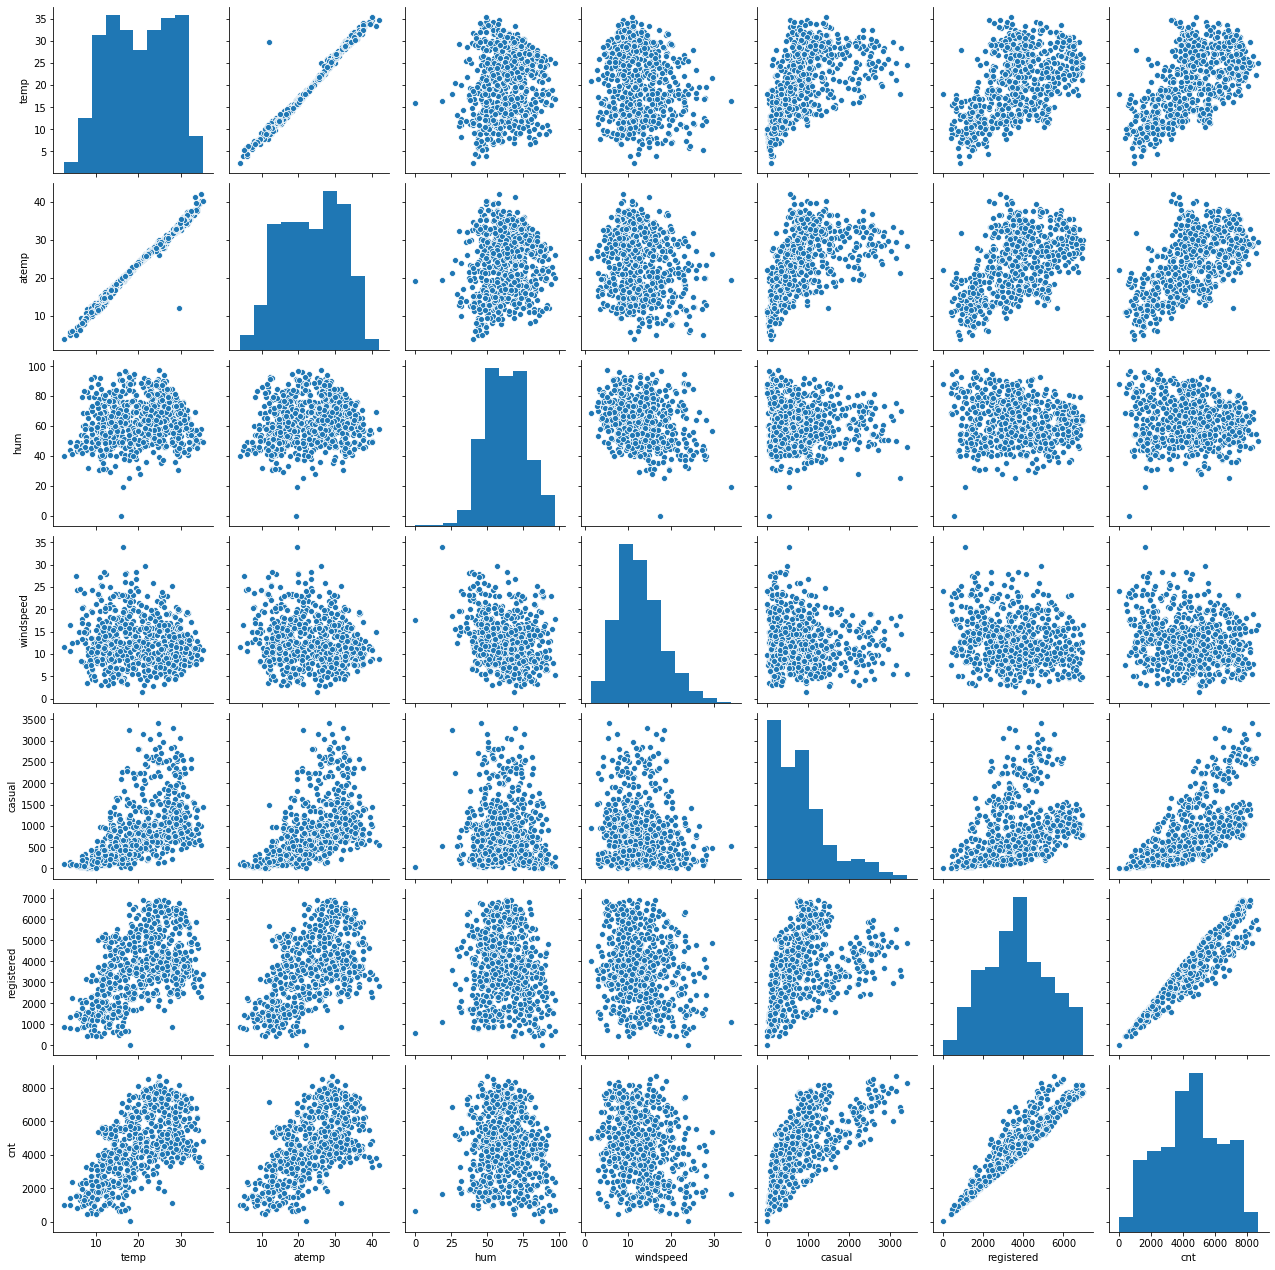

In [17]:
#visualizing numerical value
sns.pairplot(df_num)
plt.show()

In [18]:
# Correlation Matrix
cor = df_num.corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


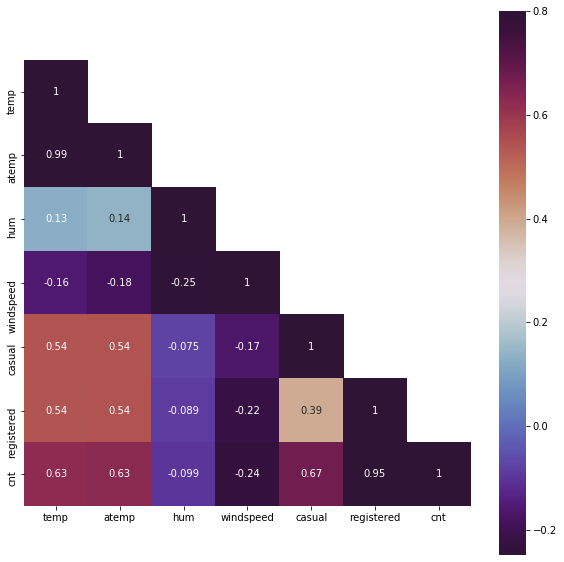

In [19]:
#heatmap of correlation matrix
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor,cmap= "twilight_shifted",mask=mask,vmax=0.8,square=True,annot=True);

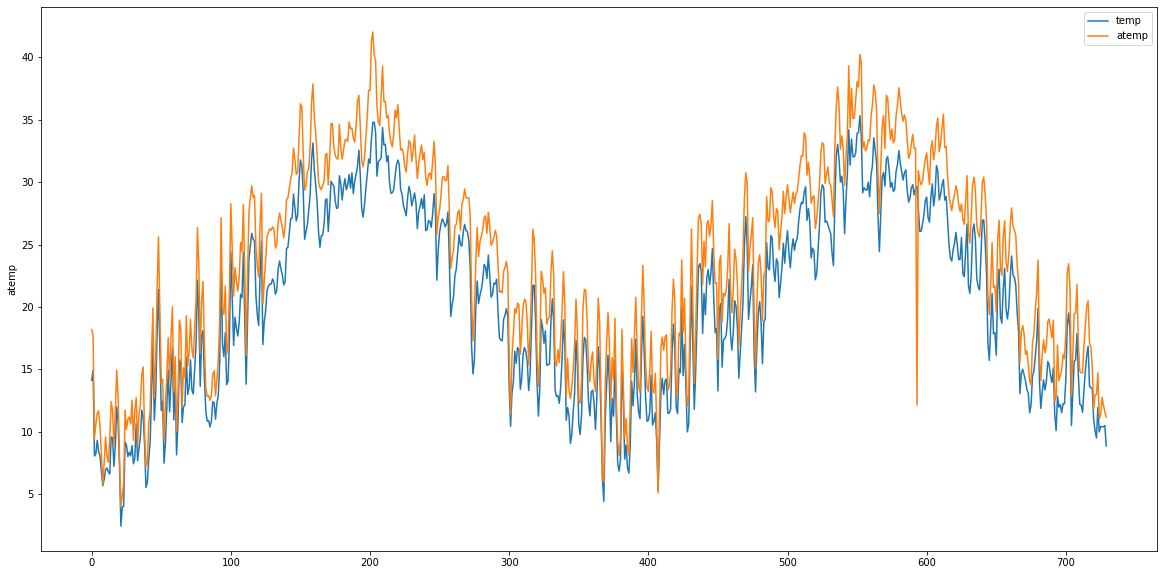

In [20]:
# plotting temp and atemp as they have high correlation value
plt.figure(figsize=(20,10))
sns.lineplot(df_num.index,df_num.temp)
sns.lineplot(df_num.index,df_num.atemp)
plt.legend(['temp','atemp'])
plt.show()

### Data preparation

In [21]:
#removing highly correlated columns
'''
Casual and registered contain direct information about the bike sharing count which is to predict (data leakage).
Therefore they are not considered in the feature set.
The variables "temp" and "atemp" are strongly correlated. 
To reduce the dimensionality of the predictive model, the feature "atemp" is dismissed.
'''

dum = df.drop(columns=['instant','dteday','atemp','casual','registered'])

In [22]:
#getting dataframe with numerical and categorical dummy columns
#creating dummy variables
dum = dum.drop(columns=['season', 'weekday', 'weathersit','mnth'], axis=1)
for i in ['season', 'weekday', 'weathersit','mnth']:
    df_dummies = pd.get_dummies(df_cat[i], prefix= i, drop_first= True)
    dum = pd.concat([dum,df_dummies], axis=1)
dum.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


### Model Building

In [23]:
#splitting dataset in train andtest
df_train, df_test = train_test_split(dum, train_size=0.8, random_state=11)

In [24]:
print(df_train.shape)
print(df_test.shape)

(584, 29)
(146, 29)


In [25]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [26]:
# Scaling of the numerical features
scaler = MinMaxScaler()

In [27]:
vars = ['temp', 'hum', 'windspeed', 'cnt']
vars

['temp', 'hum', 'windspeed', 'cnt']

In [28]:
df_train[vars] = scaler.fit_transform(df_train[vars])
df_train

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
503,1,0,0,0.673950,0.469152,0.083476,0.949232,0,1,0,...,0,0,0,0,0,0,1,0,0,0
679,1,0,1,0.450699,0.677807,0.177674,0.774930,0,0,1,...,0,0,0,0,0,0,0,1,0,0
240,0,0,1,0.719639,0.570265,0.247633,0.506829,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,0,0,1,0.000000,0.411311,0.273917,0.065273,1,0,0,...,0,0,1,0,0,0,0,0,0,0
56,0,0,1,0.278329,0.553128,0.305517,0.184697,1,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,0,0,1,0.719639,0.910454,0.157484,0.444700,0,0,1,...,0,0,0,0,0,0,0,0,0,1
337,0,0,1,0.338555,0.797772,0.083440,0.367944,0,0,1,...,1,0,0,0,0,0,0,0,0,0
91,0,0,1,0.318826,0.672237,0.328404,0.218905,0,1,0,...,0,0,0,0,0,0,0,0,0,0
80,0,0,1,0.476659,0.642245,0.390309,0.273420,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [29]:
X_train= df_train.drop(['cnt'], axis=1)
y_train = df_train['cnt']

In [30]:
# fitting a regression line using statsmodel
X = build_model(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     118.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          3.47e-213
Time:                        22:00:27   Log-Likelihood:                 583.75
No. Observations:                 584   AIC:                            -1109.
Df Residuals:                     555   BIC:                            -982.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [31]:
# dropping the variable and updating the model
'''factors:  value > 0.05
A low p-value (< 0.05) indicates that you can reject the null hypothesis
Predictor that has a low p-value is likely to be a meaningful addition to th model. SO we can drop variables having p value > 0.05
'''

'factors:  value > 0.05\nA low p-value (< 0.05) indicates that you can reject the null hypothesis\nPredictor that has a low p-value is likely to be a meaningful addition to th model. SO we can drop variables having p value > 0.05\n'

In [32]:
# We have high P value for mnth_june feature, so we can drop the column and fit the model again.

X_train_new=X.drop('mnth_June', 1)
X= build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     122.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          3.11e-214
Time:                        22:00:27   Log-Likelihood:                 583.74
No. Observations:                 584   AIC:                            -1111.
Df Residuals:                     556   BIC:                            -989.1
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [33]:
# We have high P value for mnth_march feature, so we can drop the column and fit the model again.

X_train_new=X.drop('mnth_Mar', 1)
X= build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     127.5
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.73e-215
Time:                        22:00:27   Log-Likelihood:                 583.74
No. Observations:                 584   AIC:                            -1113.
Df Residuals:                     557   BIC:                            -995.5
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [34]:
# We have high P value for weekday_thursday feature, so we can drop the column and fit the model again.

X_train_new=X.drop('weekday_Thursday', 1)
X= build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     132.8
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.40e-216
Time:                        22:00:27   Log-Likelihood:                 583.72
No. Observations:                 584   AIC:                            -1115.
Df Residuals:                     558   BIC:                            -1002.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [35]:
# We have high P value for mnth_aug feature, so we can drop the column and fit the model again.

X_train_new=X_train_new.drop('mnth_Aug', 1)
X= build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     138.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.02e-217
Time:                        22:00:28   Log-Likelihood:                 583.71
No. Observations:                 584   AIC:                            -1117.
Df Residuals:                     559   BIC:                            -1008.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [36]:
# We have high P value for season_summer feature, so we can drop the column and fit the model again.

X_train_new=X_train_new.drop('season_summer', 1)
X= build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     144.8
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.03e-218
Time:                        22:00:28   Log-Likelihood:                 583.50
No. Observations:                 584   AIC:                            -1119.
Df Residuals:                     560   BIC:                            -1014.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [37]:
# We have high P value for weekday_saturday feature, so we can drop the column and fit the model again.

X_train_new=X_train_new.drop('weekday_Saturday', 1)
X= build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     151.5
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.06e-219
Time:                        22:00:28   Log-Likelihood:                 583.26
No. Observations:                 584   AIC:                            -1121.
Df Residuals:                     561   BIC:                            -1020.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [38]:
# We have high P value for weekday_sunday feature, so we can drop the column and fit the model again.

X_train_new=X_train_new.drop('weekday_Sunday', 1)
X= build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     159.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.69e-220
Time:                        22:00:28   Log-Likelihood:                 583.20
No. Observations:                 584   AIC:                            -1122.
Df Residuals:                     562   BIC:                            -1026.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [39]:
# We have high P value for workingday feature, so we can drop the column and fit the model again.

X_train_new=X_train_new.drop('workingday', 1)
X= build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     167.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.67e-221
Time:                        22:00:28   Log-Likelihood:                 582.94
No. Observations:                 584   AIC:                            -1124.
Df Residuals:                     563   BIC:                            -1032.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [40]:
# We have high P value for weekday_Wednesday feature, so we can drop the column and fit the model again.

X_train_new=X_train_new.drop('weekday_Wednesday', 1)
X= build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     175.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.51e-222
Time:                        22:00:29   Log-Likelihood:                 582.20
No. Observations:                 584   AIC:                            -1124.
Df Residuals:                     564   BIC:                            -1037.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [41]:
# We have high P value for mnt_oct feature, so we can drop the column and fit the model again.

X_train_new=X_train_new.drop('mnth_Oct', 1)
X= build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     185.1
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          4.00e-223
Time:                        22:00:29   Log-Likelihood:                 581.38
No. Observations:                 584   AIC:                            -1125.
Df Residuals:                     565   BIC:                            -1042.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [42]:
# Calculate the VIFs again for the model

X_train_new_1 = X_train_new.drop(['const'],1)
checkVIF(X_train_new_1)

,Features,VIF
3,hum,25.94
2,temp,17.36
5,season_spring,4.59
4,windspeed,4.13
6,season_winter,3.10
13,mnth_Jan,2.37
10,weathersit_Mist + Cloudy,2.34
12,mnth_Feb,2.21
0,yr,2.02
16,mnth_Nov,2.00


In [43]:
# We have high VIF for hum feature, so we can drop the column and fit the model again.

X_train_new=X_train_new.drop('hum', 1)
X= build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     188.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          4.39e-220
Time:                        22:00:29   Log-Likelihood:                 571.38
No. Observations:                 584   AIC:                            -1107.
Df Residuals:                     566   BIC:                            -1028.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [44]:
# Calculate the VIFs for the model
X_train_new_1 = X_train_new.drop(['const'],1)
checkVIF(X_train_new_1)

,Features,VIF
2,temp,5.29
3,windspeed,4.12
4,season_spring,4.12
5,season_winter,2.77
12,mnth_Jan,2.24
11,mnth_Feb,2.16
0,yr,2.01
15,mnth_Nov,1.92
10,mnth_Dec,1.60
9,weathersit_Mist + Cloudy,1.56


In [45]:
# We have high P value for mnth_may feature, so we can drop the column and fit the model again.

X_train_new=X_train_new.drop('mnth_May', 1)
X= build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     199.7
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.02e-220
Time:                        22:00:29   Log-Likelihood:                 570.13
No. Observations:                 584   AIC:                            -1106.
Df Residuals:                     567   BIC:                            -1032.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [46]:
# Calculate the VIFs for the model

X_train_new_1 = X_train_new.drop(['const'],1)
vif = checkVIF(X_train_new_1)
vif

,Features,VIF
2,temp,4.97
3,windspeed,4.12
4,season_spring,4.03
5,season_winter,2.68
12,mnth_Jan,2.23
11,mnth_Feb,2.16
0,yr,2.01
14,mnth_Nov,1.92
10,mnth_Dec,1.60
9,weathersit_Mist + Cloudy,1.55


In [47]:
# optimizing model features more on p value
X_train_new=X_train_new.drop(['weekday_Monday'], 1)
X= build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     210.4
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.16e-220
Time:                        22:00:30   Log-Likelihood:                 566.56
No. Observations:                 584   AIC:                            -1101.
Df Residuals:                     568   BIC:                            -1031.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [48]:

# Calculate the VIFs for the model

X_train_new_1 = X_train_new.drop(['const'],1)
vif = checkVIF(X_train_new_1)
vif


,Features,VIF
2,temp,4.91
3,windspeed,4.09
4,season_spring,4.03
5,season_winter,2.67
11,mnth_Jan,2.23
10,mnth_Feb,2.16
0,yr,2.00
13,mnth_Nov,1.92
9,mnth_Dec,1.60
8,weathersit_Mist + Cloudy,1.55


### list of features after fitting using Statsmodel

In [49]:
vif[['Features']]

,Features
2,temp
3,windspeed
4,season_spring
5,season_winter
11,mnth_Jan
10,mnth_Feb
0,yr
13,mnth_Nov
9,mnth_Dec
8,weathersit_Mist + Cloudy


### crosschecking features with RFE

In [50]:
# Training and Making Predictions
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
rfe = RFE(lr, 16)
rfe = rfe.fit(X_train,y_train)

In [52]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 9),
 ('season_winter', True, 1),
 ('weekday_Monday', False, 7),
 ('weekday_Saturday', False, 5),
 ('weekday_Sunday', False, 4),
 ('weekday_Thursday', False, 10),
 ('weekday_Tuesday', False, 6),
 ('weekday_Wednesday', False, 8),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist + Cloudy', True, 1),
 ('mnth_Aug', False, 11),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 13),
 ('mnth_Mar', False, 12),
 ('mnth_May', False, 2),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', True, 1),
 ('mnth_Sep', True, 1)]

In [53]:
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'weathersit_Light Snow', 'weathersit_Mist + Cloudy',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_Nov', 'mnth_Oct',
       'mnth_Sep'],
      dtype='object')

In [54]:
# Build a model using statsmodel
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,yr,holiday,temp,hum,windspeed,season_spring,season_winter,weathersit_Light Snow,weathersit_Mist + Cloudy,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_Nov,mnth_Oct,mnth_Sep
503,1,0,0.673950,0.469152,0.083476,0,0,0,0,0,0,0,0,0,0,0
679,1,0,0.450699,0.677807,0.177674,0,1,0,0,0,0,0,0,1,0,0
240,0,0,0.719639,0.570265,0.247633,0,0,0,0,0,0,0,0,0,0,0
21,0,0,0.000000,0.411311,0.273917,1,0,0,0,0,0,1,0,0,0,0
56,0,0,0.278329,0.553128,0.305517,1,0,0,0,0,1,0,0,0,0,0


In [55]:
# adding constraint column and build model

X_train_rfe = build_model(X_train_rfe, y_train)
X_train_rfe_new = X_train_rfe.drop(['const'], axis=1)
checkVIF(X_train_rfe_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     201.1
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.04e-221
Time:                        22:00:31   Log-Likelihood:                 571.79
No. Observations:                 584   AIC:                            -1110.
Df Residuals:                     567   BIC:                            -1035.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
3,hum,24.31
2,temp,17.29
6,season_winter,8.23
5,season_spring,4.63
13,mnth_Nov,4.25
4,windspeed,4.08
14,mnth_Oct,3.58
9,mnth_Dec,2.93
11,mnth_Jan,2.50
10,mnth_Feb,2.33


In [56]:
# dropping humidity column due to high VIF
X_train_new = X_train_rfe_new.drop(['hum'], axis=1)
X_train_new.head()

,yr,holiday,temp,windspeed,season_spring,season_winter,weathersit_Light Snow,weathersit_Mist + Cloudy,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_Nov,mnth_Oct,mnth_Sep
503,1,0,0.673950,0.083476,0,0,0,0,0,0,0,0,0,0,0
679,1,0,0.450699,0.177674,0,1,0,0,0,0,0,0,1,0,0
240,0,0,0.719639,0.247633,0,0,0,0,0,0,0,0,0,0,0
21,0,0,0.000000,0.273917,1,0,0,0,0,0,1,0,0,0,0
56,0,0,0.278329,0.305517,1,0,0,0,0,1,0,0,0,0,0


In [57]:
X_train_new = build_model(X_train_new,y_train)
X_train_new = X_train_new.drop(['const'], axis=1)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     206.2
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.57e-218
Time:                        22:00:32   Log-Likelihood:                 561.63
No. Observations:                 584   AIC:                            -1091.
Df Residuals:                     568   BIC:                            -1021.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
5,season_winter,8.13
2,temp,4.89
4,season_spring,4.30
12,mnth_Nov,4.09
3,windspeed,4.07
13,mnth_Oct,3.55
8,mnth_Dec,2.71
10,mnth_Jan,2.34
9,mnth_Feb,2.28
0,yr,2.00


In [58]:
# dropping mnth_oct column due to p value >0.05
X_train_new = X_train_new.drop(['mnth_Oct'], axis=1)

X_train_new = build_model(X_train_new,y_train)
X_train_new = X_train_new.drop(['const'], axis=1)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     221.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.42e-219
Time:                        22:00:32   Log-Likelihood:                 561.26
No. Observations:                 584   AIC:                            -1093.
Df Residuals:                     569   BIC:                            -1027.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
2,temp,4.87
3,windspeed,4.07
4,season_spring,4.02
5,season_winter,2.67
10,mnth_Jan,2.23
9,mnth_Feb,2.16
0,yr,2.00
12,mnth_Nov,1.92
8,mnth_Dec,1.60
7,weathersit_Mist + Cloudy,1.55


##### Therefore, got a feature set whose P value is <0.05 and VIF less than 6 with minimum F stats prob, R sq and adjusted R sq above 84 and low AIC and BIC value

In [59]:
X_train_new = sm.add_constant(X_train_new)

lr_10 = sm.OLS(y_train, X_train_new).fit()

In [60]:
X_train_new.drop(['const'],1).columns.sort_values(ascending = True)

Index(['holiday', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_Nov',
       'mnth_Sep', 'season_spring', 'season_winter', 'temp',
       'weathersit_Light Snow', 'weathersit_Mist + Cloudy', 'windspeed', 'yr'],
      dtype='object')

In [61]:
vif.Features.sort_values(ascending = True)

1                      holiday
9                     mnth_Dec
10                    mnth_Feb
11                    mnth_Jan
12                   mnth_July
13                    mnth_Nov
14                    mnth_Sep
4                season_spring
5                season_winter
2                         temp
7        weathersit_Light Snow
8     weathersit_Mist + Cloudy
6              weekday_Tuesday
3                    windspeed
0                           yr
Name: Features, dtype: object

### Residual Analysis

In [62]:
y_train_pred = lr_10.predict(X_train_new)
y_train_pred

503    0.773681
679    0.663284
240    0.515072
21     0.057337
56     0.177278
         ...   
269    0.566623
337    0.382861
91     0.266941
80     0.402423
703    0.615952
Length: 584, dtype: float64

Text(0.5, 0, 'Errors')

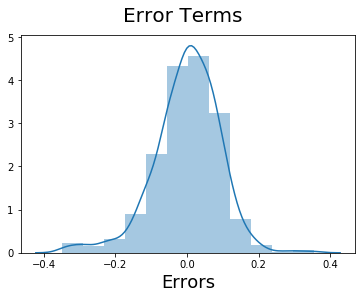

In [63]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 12)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

#### error terms are normally distributed.

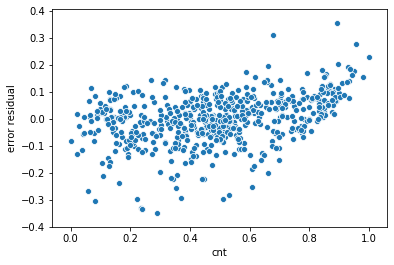

In [64]:
# ploting for error terms for homoscedasticity
sns.scatterplot(y_train,(y_train - y_train_pred) )
plt.ylabel("error residual")
plt.show()

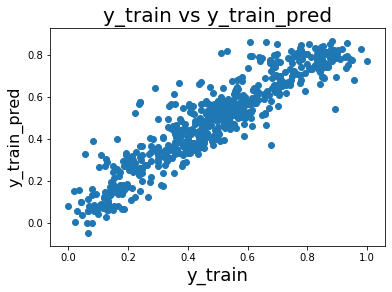

In [65]:
#plots y train and y pred
plt.scatter(y_train,y_train_pred)
plt.title('y_train vs y_train_pred', fontsize=20)
plt.xlabel('y_train', fontsize=18)
plt.ylabel('y_train_pred', fontsize=16)
plt.show()

### Making Predictions

In [66]:
# test dataset
df_test[vars] = scaler.transform(df_test[vars])
df_test

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
667,1,0,1,0.322791,0.848797,0.362735,0.079173,0,0,1,...,0,0,0,0,0,0,0,0,1,0
541,1,0,1,0.712370,0.383890,0.654111,0.846247,0,0,0,...,0,0,0,0,1,0,0,0,0,0
429,1,0,1,0.248216,0.469580,0.336474,0.424876,1,0,0,...,0,0,0,0,0,1,0,0,0,0
150,0,0,1,0.892009,0.654670,0.142676,0.428019,0,1,0,...,0,0,0,0,0,0,1,0,0,0
296,0,0,1,0.503656,0.793916,0.158828,0.452798,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,0,0,1,0.852550,0.778492,0.098265,0.410855,0,0,0,...,0,0,0,1,0,0,0,0,0,0
411,1,0,0,0.320903,0.774208,0.099599,0.309924,1,0,0,...,0,1,0,0,0,0,0,0,0,0
530,1,0,0,0.722754,0.606255,0.283974,0.873202,0,1,0,...,0,0,0,0,1,0,0,0,0,0
723,1,1,0,0.289300,0.755561,0.266896,0.069141,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [67]:
X_test = df_test[X_train_new.drop(['const'],1).columns]
y_test = df_test['cnt']
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 667 to 250
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   yr                        146 non-null    int64  
 1   holiday                   146 non-null    int64  
 2   temp                      146 non-null    float64
 3   windspeed                 146 non-null    float64
 4   season_spring             146 non-null    uint8  
 5   season_winter             146 non-null    uint8  
 6   weathersit_Light Snow     146 non-null    uint8  
 7   weathersit_Mist + Cloudy  146 non-null    uint8  
 8   mnth_Dec                  146 non-null    uint8  
 9   mnth_Feb                  146 non-null    uint8  
 10  mnth_Jan                  146 non-null    uint8  
 11  mnth_July                 146 non-null    uint8  
 12  mnth_Nov                  146 non-null    uint8  
 13  mnth_Sep                  146 non-null    uint8  
dtypes: float

In [68]:
#creating test model 
X_testing = sm.add_constant(X_test)
X_testing

,const,yr,holiday,temp,windspeed,season_spring,season_winter,weathersit_Light Snow,weathersit_Mist + Cloudy,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_Nov,mnth_Sep
667,1.0,1,0,0.322791,0.362735,0,1,0,1,0,0,0,0,0,0
541,1.0,1,0,0.712370,0.654111,0,0,0,0,0,0,0,0,0,0
429,1.0,1,0,0.248216,0.336474,1,0,0,0,0,0,0,0,0,0
150,1.0,0,0,0.892009,0.142676,0,0,0,0,0,0,0,0,0,0
296,1.0,0,0,0.503656,0.158828,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,1.0,0,0,0.852550,0.098265,0,0,0,0,0,0,0,1,0,0
411,1.0,1,0,0.320903,0.099599,1,0,0,1,0,1,0,0,0,0
530,1.0,1,0,0.722754,0.283974,0,0,0,0,0,0,0,0,0,0
723,1.0,1,1,0.289300,0.266896,1,0,0,1,1,0,0,0,0,0


In [69]:
X_testing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 667 to 250
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   const                     146 non-null    float64
 1   yr                        146 non-null    int64  
 2   holiday                   146 non-null    int64  
 3   temp                      146 non-null    float64
 4   windspeed                 146 non-null    float64
 5   season_spring             146 non-null    uint8  
 6   season_winter             146 non-null    uint8  
 7   weathersit_Light Snow     146 non-null    uint8  
 8   weathersit_Mist + Cloudy  146 non-null    uint8  
 9   mnth_Dec                  146 non-null    uint8  
 10  mnth_Feb                  146 non-null    uint8  
 11  mnth_Jan                  146 non-null    uint8  
 12  mnth_July                 146 non-null    uint8  
 13  mnth_Nov                  146 non-null    uint8  
 14  mnth_Sep

In [70]:
# Making Predictions
y_pred = lr_10.predict(X_testing)
y_pred

667    0.597414
541    0.709712
429    0.474525
150    0.595500
296    0.524895
         ...   
205    0.527219
411    0.391798
530    0.764715
723    0.255774
250    0.283577
Length: 146, dtype: float64

In [71]:
print(f'R-squared of test data : {r2_score(y_test,y_pred)}')

R-squared of test data : 0.7910553619184459


##### Significant features for bike sharing demand prediction are
    - 'holiday'
    - 'mnth_Dec'
    - 'mnth_Feb'
    - 'mnth_Jan' 
    - 'mnth_July'
    - 'mnth_Nov'
    - 'mnth_Sep'
    - 'season_spring'
    - 'season_winter'
    - 'temp'
    - 'weathersit_Light Snow'
    - 'weathersit_Mist + Cloudy'
    - 'windspeed'
    - 'yr
    